<a href="https://colab.research.google.com/github/b15145456/Neural-Network-By-scratch/blob/master/%E9%A1%9E%E7%A5%9E%E7%B6%93%E7%B6%B2%E8%B7%AFHW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

多層感知機

---
*   層數 layer_num (要可以自由設定)
*   維度 根據資料的feature
---
步驟：以3個feature 1層輸出層, 3層隱藏層, 1層輸出層神經元為例
$$
  x = \begin{pmatrix}
        -1 & x_1 & x_2 & x_3 \\
        \end{pmatrix}
$$
$$$$
$
       w_{ij} = \begin{pmatrix}
        -1 & a_{11} & a_{21} & a_{31} \\
        -1 & a_{12} & a_{22} & a_{32} \\
        -1 & a_{13} & a_{23} & a_{33} \\
        \end{pmatrix}
$
$
      w_{ij}^\mathrm T = 
      \begin{pmatrix}
        -1 & -1 & -1  \\
        a_{11} & a_{12} & a_{23} \\
        a_{21} & a_{22} & a_{23} \\
        a_{31} & a_{32} & a_{33} \\
      \end{pmatrix}
$
$$$$

$$
  v(n) = \Sigma_{i=0}^3xw_{ij}^\mathrm T \qquad y(n) = \Phi v(n)  
$$

$$$$

$$
   w_{ij}(n+1) = w_{ij} + \Delta w_{ij}(n) = w_{ij} + \eta \delta_j(n) y_i(n)
$$

若j神經元是輸出層神經
$$
          \delta_j(n) = [d_j(n)-y_j(n)] \quad y_j(n)[1-y_j(n)]
$$
若j神經元是隱藏層神經
$$
          \delta_j(n) = y_j(n)[1-y_j(n)] \quad \Sigma\delta_k(n)w_{kj}(n)
$$


1. 初始化鍵結值
2. 前饋
3. 輸出y值
4. 判斷此神經元是否為輸出神經元
5. 回饋往回修改鍵結值
6. 回到步驟2.

In [ ]:
  #自由決定hidden layer 的 neural數目
  #根據上層的input 建立對應的w
  class hiddenLayer:
    def __init__(self, neural_num):
      self.layer_name = "hidden"
      self.neural_num = neural_num
      self.init = 0

    def sigmoid(self,x):
      return 1/(1+math.exp(-x))

    def input(self, inputdata):
      # print('--------------input to hidden Layer')
      self.upper_input = inputdata
      # print(self.upper_input.shape)
      if self.init == 0:
        self.hid_w = np.random.rand(self.upper_input.shape[0]+1, self.neural_num)
      self.init = 1    

    def output(self):
      self.upper_input = np.insert(self.upper_input, 0, -1.)
      self.weightSum = np.dot(self.upper_input.T, self.hid_w)
      sigmoid_v = np.vectorize(self.sigmoid)
      self.phi_res = sigmoid_v(self.weightSum)
      self.old_hid_w = self.hid_w
      return self.phi_res

    def update(self, upper_old_hid_w, learning_rate, upper_phi_res, up_respon):
      self.respon = 0
      self.respon = self.phi_res*(1-self.phi_res)*np.dot(np.array(up_respon), np.array(upper_old_hid_w[1:,]).T)
      # print('self.respon')
      # print(self.respon)
      self.hid_w = self.old_hid_w + learning_rate * np.dot(np.array([upper_phi_res]).T, np.array([self.respon]) )
      # print('self.hid_w')
      # print(self.hid_w)
      # print('update!!!!')


In [ ]:
  #根據y的類別個數決定 neural數目
  #計算並回傳均方誤差
  class outputLayer:
    def __init__(self, neural_num=1):
      self.layer_name = "output"
      self.neural_num = neural_num      #neural_num要和結果個數一樣(群數)
      self.init = 0
    def sigmoid(self,x):
      return 1/(1+math.exp(-x))
    def input(self, inputdata):
      self.upper_input = inputdata
      if self.init == 0:
        # self.hid_w = np.array([0.5, 0.4, 0.8])
        self.hid_w = np.random.rand(self.upper_input.shape[0]+1, self.neural_num)
      else:
        self.init = 1
    def output(self):
      self.upper_input = np.insert(self.upper_input, 0, -1.)
      self.weightSum = np.dot(self.upper_input.T, self.hid_w)
      sig_v = np.vectorize(self.sigmoid)
      self.phi_res = sig_v(self.weightSum)
      self.old_hid_w = self.hid_w
      return self.phi_res

    def update(self, learning_rate, target):
      self.respon = 0
      self.respon = (target - self.phi_res)* self.phi_res* (1 - self.phi_res)
      self.hid_w = self.old_hid_w + learning_rate * np.array([self.upper_input]).T.dot(self.respon)
      
      
      


In [ ]:
import numpy as np
from sklearn import preprocessing
import sklearn.preprocessing
import sklearn.model_selection
import math
import matplotlib.pyplot as plt
class MultiNeuralNetwork: 
  def __init__(self, feature_num, class_num, hiddenLayer_num, hiddenNeural_num, data_x, data_y, learning_rate = 0.1):
    self.hidden_layer_list = []
    self.feature_num = feature_num
    self.class_num = class_num
    self.hiddenLayer_num = hiddenLayer_num
    self.hiddenNeural_num = hiddenNeural_num
    self.data_x = data_x
    self.data_y = data_y
    self.learning_rate = learning_rate
    self.rmse_list = []
    self.total_times = 0
    self.true = 0
    for i in range(1, hiddenLayer_num+1):           #hiddenLayer_num_1,2.....hiddenLayer_num
      self.hidden_layer_list.append(hiddenLayer(hiddenNeural_num))
    self.output_layer = outputLayer(class_num)
    
  def forward(self, forward_data):
    #hiddenLayer
    self.forward_data = forward_data
    for layer_id in range(len(self.hidden_layer_list)):
      this_hid_layer = self.hidden_layer_list[layer_id]
      this_hid_layer.input(self.forward_data)
      self.forward_data = this_hid_layer.output()
    #outputLayer
    self.output_layer.input(self.forward_data)
    self.pred_y = self.output_layer.output()
    # print('forward done !')

  def rmse(self):
    return np.sqrt((np.array(self.rmse_list)**2).mean())


  def train(self, times):
    while times>0:
      for data_index in range(len(self.data_x)):
        self.total_times += 1

        # print(self.data_x[data_index])
        self.forward(self.data_x[data_index])
        self.backpropagation(self.data_y[data_index])
        self.rmse_list.append(self.pred_y - self.data_y[data_index])
        # print(self.pred_y)
        if self.pred_y < 0.5 and self.data_y[data_index] == self.data_y.min():
          self.true +=1
        elif self.pred_y >= 0.5 and self.data_y[data_index] == self.data_y.min()+1:
          self.true +=1

        if self.pred_y < 0.5:
          plt.scatter(self.data_x[data_index][0],self.data_x[data_index][1], marker="o", c = 'r')
        elif self.pred_y >= 0.5:
          plt.scatter(self.data_x[data_index][0],self.data_x[data_index][1], marker="o",c = 'b')
      times-=1
    print('RMSE=')
    print(self.rmse())
    print('辨識率')
    print( self.true/self.total_times )
    plt.show()
    return 'train done'

  def backpropagation(self, target):
    self.back_prop_list = []
    self.back_prop_list.append(self.output_layer)
    self.back_prop_list = self.back_prop_list + self.hidden_layer_list[::-1]
    for layer_index in range(len(self.back_prop_list)):
      if self.back_prop_list[layer_index].layer_name == "output":
        self.back_prop_list[layer_index].update(self.learning_rate, target)
      else:
        self.back_prop_list[layer_index].update( self.back_prop_list[layer_index-1].old_hid_w, self.learning_rate, self.back_prop_list[layer_index].upper_input, self.back_prop_list[layer_index-1].respon)
      #(self, upper_hid_w, learning_rate, upper_phi_res, up_respon)
    self.output_layer = self.back_prop_list[0]
    self.back_prop_list.remove(self.output_layer)
    self.hidden_layer_list = self.back_prop_list[::-1]


In [ ]:
def load_train_test_data(train_ratio=.5):
    data = np.loadtxt("2ring.txt",dtype=np.float,delimiter=' ')
    X = data[:,0:data.shape[1]-1]
    y = data[:,data.shape[1]-1]
    return sklearn.model_selection.train_test_split(X, y, test_size = 1 - train_ratio, random_state=0)
def scale_features(X_train, X_test, low=0, upp=1):
    minmax_scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(low, upp)).fit(np.vstack((X_train, X_test)))
    X_train_scaled = minmax_scaler.transform(X_train)
    X_test_scaled = minmax_scaler.transform(X_test)
    return X_train_scaled, X_test_scaled

RMSE=
0.9124566981056491
辨識率
0.4272361809045226


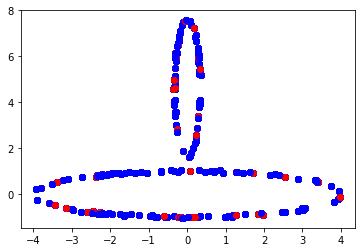

'train done'

In [ ]:
X_train, X_test, y_train, y_test = load_train_test_data(train_ratio=0.666)

nn = MultiNeuralNetwork(X_train.shape[1],  1, 2, 2, X_train, y_train, 0.1) 
nn.train(100)


RMSE=
0.955776394313747
辨識率
0.6697080291970803


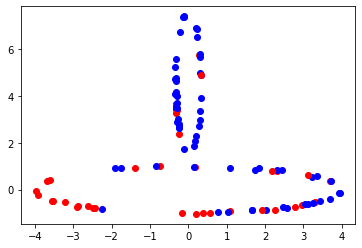

'train done'

In [ ]:
nn.data_x = X_test
nn.data_y = y_test
nn.train(1)

In [ ]:
print('hidden layer 鍵結值')
for i in range(len(nn.hidden_layer_list)):
  print(nn.hidden_layer_list[i].hid_w)

print('output layer 鍵結值')

nn.output_layer.hid_w

hidden layer 鍵結值
[[-0.47798711 -0.14663295]
 [ 0.18934746  0.83799269]
 [ 1.15747739  1.25658515]]
output layer 鍵結值


array([[ 0.57460779,  0.64890253,  0.64899991],
       [-0.01903095,  0.05526379,  0.05536117],
       [ 0.93497147,  1.0092662 ,  1.00936359]])

In [ ]:
reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [ ]:
import numpy as np

np.random.seed(42)
arr = np.random.randint(1, 10, size=(3, 4))
print(arr[0])
print(arr[1, 1]) # 3 located at (1, 1)
print(arr[2, -3]) # 4 located at (2, -3)

[7 4 8 5]
3
4


In [ ]:
a = np.random.rand(2, 2)
print(a)
a = np.insert(a, 0, -1.)    #在最前面插入-1
print(a)

[[0.65088847 0.05641158]
 [0.72199877 0.93855271]]
[-1.          0.65088847  0.05641158  0.72199877  0.93855271]


In [ ]:
import numpy as np
a = np.array([-1, 1, 1])
b = np.array([[-1, -2],
              [-3, -4],
              [-5, -6]])
print(a.shape)
print(b.shape)
c = np.dot(a, b)
print(c)
print(b[0,:])
print(b[:,0])
print(1-a)

(3,)
(3, 2)
[-7 -8]
[-1 -2]
[-1 -3 -5]
[2 0 0]


In [ ]:
#練習輸出層往隱藏層之鏈結更新
target = np.array([[1, 0]])
phi = np.array([[0.22, 0.19]])
respon0 = (target - phi)*phi*(1-phi)
back_data = np.array([[-1, 0.9, 0.9, 0.9]])
print(respon0)
hid_w = np.array([[-0.1, -0.2],
                  [-0.3, -0.4],
                  [-0.5, -0.6],
                  [-0.7, -0.8]])
print(0.5*back_data.T.dot(respon0))
hid_w += 0.5*back_data.T.dot(respon0)
print(hid_w)

[[ 0.133848 -0.029241]]
[[-0.066924    0.0146205 ]
 [ 0.0602316  -0.01315845]
 [ 0.0602316  -0.01315845]
 [ 0.0602316  -0.01315845]]
[[-0.166924   -0.1853795 ]
 [-0.2397684  -0.41315845]
 [-0.4397684  -0.61315845]
 [-0.6397684  -0.81315845]]


In [ ]:
#練習隱藏層往隱藏層之鏈結更新
up_hid_w = hid_w
# print(hid_w0[1:,])
phi = np.array([[0.9, 0.9, 0.9]])
up_data = np.array([[-1, 0.0009, 0.0003]])
respon1 = phi*(1-phi)*np.dot(respon0,up_hid_w[1:,].T)
print(respon1)
# print(g)
c = np.array([[-7.0,  -8,  -9],
              [-10, -11, -12],
              [-13, -14, -15]])
# print(0.5*j.T.dot(g))
c += 0.5 * np.dot(respon1.T ,up_data)
print(c)

[[-0.00180102 -0.00368395 -0.00556687]]
[[ 9.00510956e-04 -8.10459860e-07 -2.70153287e-07]
 [ 1.84197396e-03 -1.65777656e-06 -5.52592187e-07]
 [ 2.78343696e-03 -2.50509326e-06 -8.35031087e-07]]
[[ -6.99909949  -8.00000081  -9.00000027]
 [ -9.99815803 -11.00000166 -12.00000055]
 [-12.99721656 -14.00000251 -15.00000084]]


In [ ]:
a = [0, 1, 2, 3]
b = [4,5,6]
a+b[::-1]
a[0:1]

[0]

In [ ]:
def sigmoid(x):
      return 1/(1+math.exp(-x))
sigmoid(2.24141639)

0.903907554467206

In [ ]:
for i in range(1, 5+1):           #hiddenLayer_num_1,2.....hiddenLayer_num
      print(i)

1
2
3
4
5


In [ ]:
l = ['Alice', 'Bob', 'Charlie', 'Bob', 'Dave']
a = l[::-1]
print(a)

['Dave', 'Bob', 'Charlie', 'Bob', 'Alice']


In [ ]:
def sigmoid(x):
  return 1/(1+math.exp(-x))
a = sigmoid(2)
a

0.8807970779778823

In [ ]:
c = ['1','2','3']
a = []
a.append('4')
d = a + c[::-1]
print(d)
for layer_index in range(len(d)):
  print(layer_index)
# # for layer_index in range(len(d)):
#       if self.back_prop_list[layer_index].layer_name == "output":
#         self.back_prop_list[layer_index].update(self.learning_rate, target)
#       else:
#         self.back_prop_list[layer_index].update( self.back_prop_list[layer_index-1].old_hid_w, self.learning_rate, self.back_prop_list[layer_index].upper_input, self.back_prop_list[layer_index-1].respon)
#       #(self, upper_hid_w, learning_rate, upper_phi_res, up_respon)
#     self.output_layer = self.back_prop_list[0]
#     self.back_prop_list.remove(self.output_layer)
#     self.hidden_layer_list = self.back_prop_list[::-1]


['4', '3', '2', '1']
0
1
2
3


In [ ]:
np.random.rand(2, 3)

array([[3.46028626e-04, 9.36195320e-01, 5.96473406e-01],
       [4.21498138e-01, 6.68935830e-01, 9.24722752e-03]])